# **Lecture et pretraitement des données**

In [69]:
import os
KAGGLE_WORKING_DIR = '/kaggle/input/base-de-donnee-xray/base de donnee Xray'
SIZE = 224
BATCH_SIZE =300
CHANNELS =3
EPOCHS = 50

In [70]:
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    
    KAGGLE_WORKING_DIR,
    shuffle = True,
    image_size = (224,224),
    batch_size = BATCH_SIZE

)
    

Found 3419 files belonging to 3 classes.


# **Recupération des differntes classes dans nos données**

In [71]:

class_labels = dataset.class_names
class_labels

['normal', 'pneumonie viral', 'pneunomie bacterienne']

# **Affichage de quelques images de la bd**

(300, 224, 224, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(300,), dtype=int32, numpy=
array([2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 

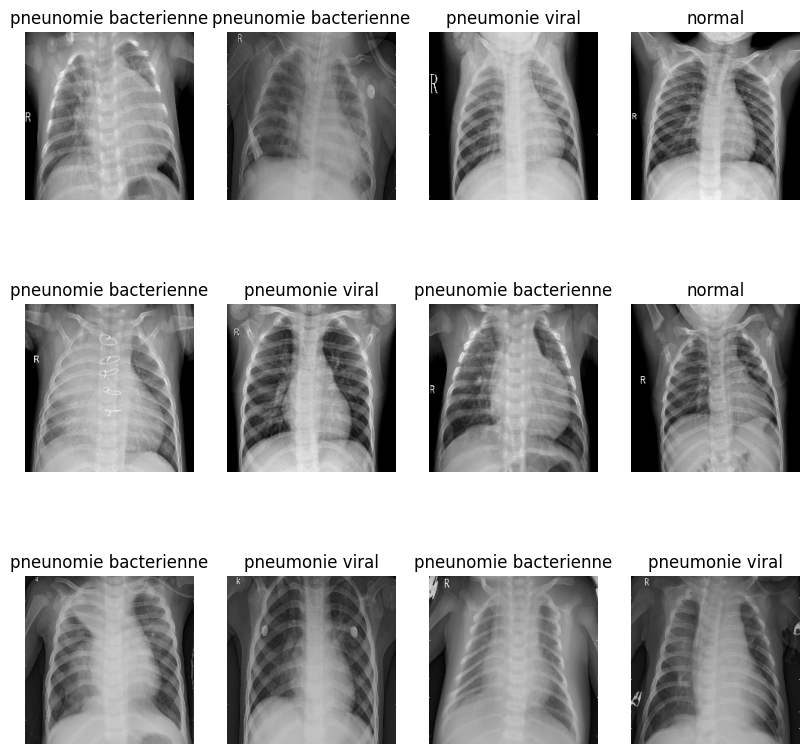

In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_labels[label_batch[i]])
    plt.axis("off")

# **Division de notre base de données en train, val et test (80%,10%,10%)**

In [73]:
DATASET_SIZE = len(dataset)
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.10 * DATASET_SIZE)
test_size = int(0.10 * DATASET_SIZE)
dataset = dataset.shuffle(1000, seed=12)#La fonction shuffle() permet de mélanger l'ensemble de données avant de diviser les données en ensembles d'entraînement, de validation et de test.
train_dataset = dataset.take(train_size)#La méthode take() permet de prendre les premiers éléments de l'ensemble de données, 
print(len(train_dataset))
test_dataset = dataset.skip(train_size)#la méthode skip() permet de sauter les premiers éléments de l'ensemble de données.
print(len(test_dataset))
val_dataset = test_dataset.take(val_size)
print(len(val_dataset))
test_dataset = test_dataset.skip(test_size)
print(len(test_dataset))

9
3
1
2


La méthode cache() est utilisée pour stocker en cache les éléments de l'ensemble de données après leur première utilisation. Cela permet d'accélérer le processus d'entraînement car les données sont chargées en mémoire au lieu d'être relues à partir du disque.
La méthode shuffle() est utilisée pour mélanger l'ensemble de données afin de garantir que les exemples sont présentés à l'apprentissage dans un ordre aléatoire.
La méthode prefetch() permet de précharger les données pour le traitement ultérieur.

In [74]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
print(len(train_ds),len(val_ds),len(test_ds))

9 1 2


# **Redimensionne et normalise les images**

In [75]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Définir la taille de l'image

resize_and_rescale = tf.keras.Sequential([ 
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

La map()fonction prend une fonction comme argument et applique cette fonction à chaque élément de l'ensemble de données.
La prefetch()fonction est utilisée pour améliorer les performances du processus de chargement des données. Il prélève un certain nombre de lots à l'avance, de sorte que le lot suivant soit prêt à être traité au moment où le lot en cours est terminé. L' tf.data.AUTOTUNEargument indique à TensorFlow de déterminer dynamiquement la taille optimale du tampon de prélecture en fonction des ressources système disponibles.

# **Architecture du CNN**

In [78]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

In [80]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [81]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [82]:
tf.test.gpu_device_name()

''

Epoch 1/50
9/9 [==============================] - 172s 17s/step - loss: 40.6676 - accuracy: 0.3374 - val_loss: 1.4407 - val_accuracy: 0.3167
Epoch 2/50
9/9 [==============================] - 133s 15s/step - loss: 1.2404 - accuracy: 0.3783 - val_loss: 1.0411 - val_accuracy: 0.4300
Epoch 3/50
9/9 [==============================] - 133s 15s/step - loss: 1.0008 - accuracy: 0.4934 - val_loss: 0.9314 - val_accuracy: 0.5100
Epoch 4/50
9/9 [==============================] - 133s 16s/step - loss: 0.8589 - accuracy: 0.6106 - val_loss: 0.7460 - val_accuracy: 0.7433
Epoch 5/50
9/9 [==============================] - 133s 15s/step - loss: 0.7044 - accuracy: 0.7217 - val_loss: 0.6098 - val_accuracy: 0.7467
Epoch 6/50
9/9 [==============================] - 133s 15s/step - loss: 0.5850 - accuracy: 0.7733 - val_loss: 0.5046 - val_accuracy: 0.8167
Epoch 7/50
9/9 [==============================] - 133s 15s/step - loss: 0.5145 - accuracy: 0.8023 - val_loss: 0.4900 - val_accuracy: 0.8200
Epoch 8/50
9/9 [===

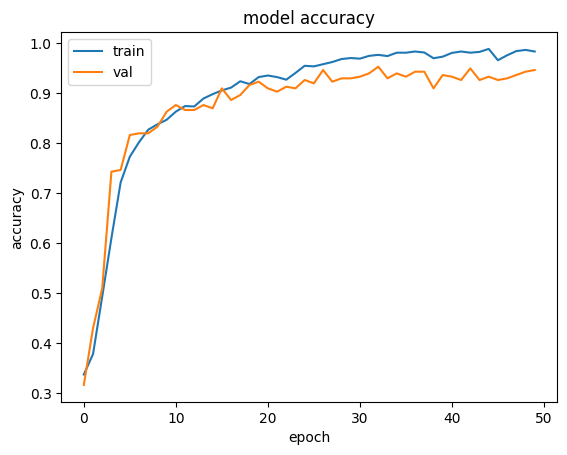

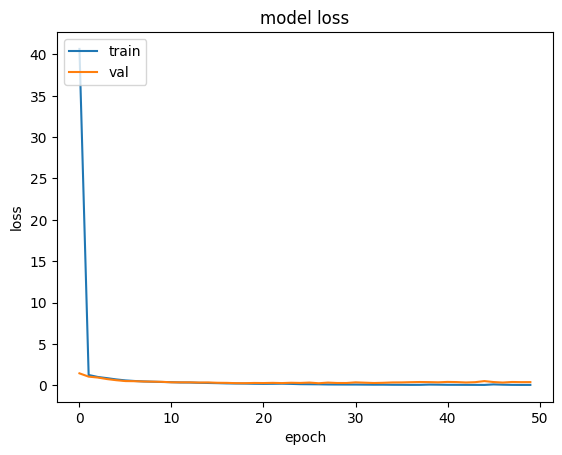

In [83]:

from tensorflow.keras.callbacks import ModelCheckpoint

# Créer un callback pour sauvegarder le meilleur modèle basé sur la performance de validation
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Entraîner le modèle avec le callback
history = model.fit(
     train_ds,
     epochs=EPOCHS,
     batch_size=BATCH_SIZE,
     verbose=1,
     validation_data=val_ds,
     callbacks=[checkpoint])

  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

  # Plot history: loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [84]:
model.evaluate(test_ds)

2/2 [==============================] - 25s 5s/step - loss: 0.2920 - accuracy: 0.9633


[0.2919526696205139, 0.9633333086967468]

# **Premiere prediction**

first image to predict
actual label: normal
10/10 [==============================] - 5s 451ms/step
predicted label: normal


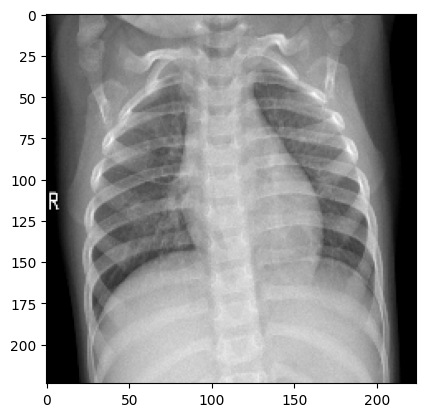

In [85]:
from tensorflow.python.ops.gen_batch_ops import batch
import numpy as np
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_labels[first_label])

  batch_predic = model.predict(image_batch)
  print("predicted label:", class_labels[np.argmax(batch_predic[0])])

In [86]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# **Prediction de 9 images avec une confiance pour chaque prediction**

1/1 [==============================] - 0s 39ms/step


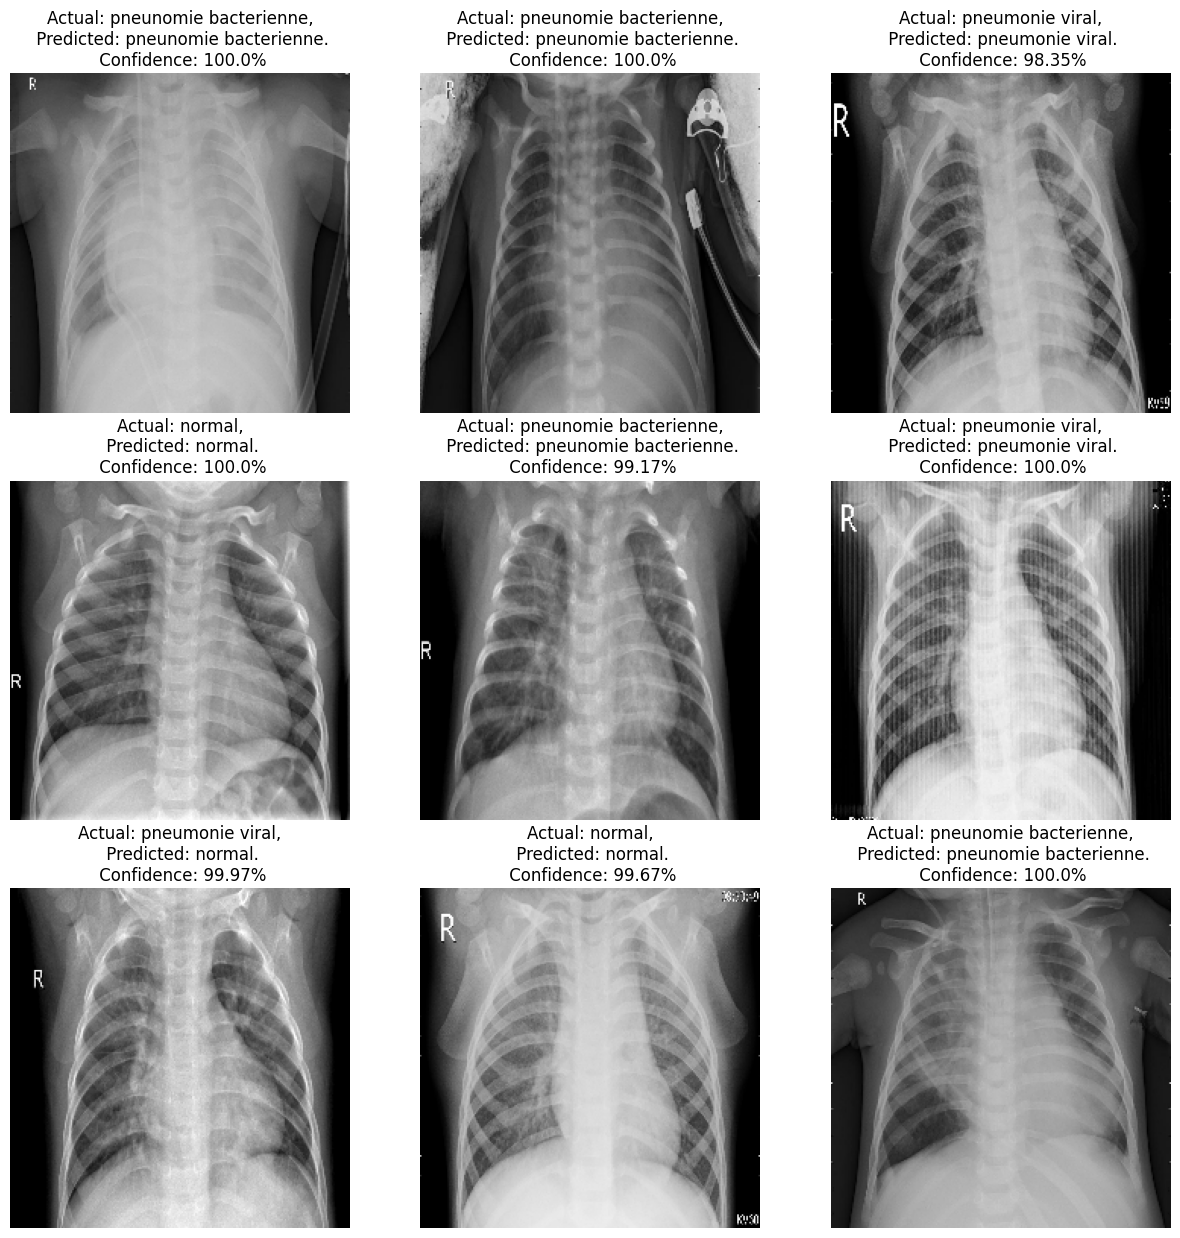

In [87]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_labels[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# **Enregistrement du model et lecture du modele par la suite**

In [88]:

model.save(f"{'/kaggle/working/'}/models")

In [89]:
model.load_weights(f"{'/kaggle/working'}/models")

# **Evaluation du modele sur les données de test**

In [90]:
model.evaluate(test_ds)

2/2 [==============================] - 9s 5s/step - loss: 0.2920 - accuracy: 0.9633


[0.2919526696205139, 0.9633333086967468]

# **Matrice de confusion**

2/2 [==============================] - 10s 5s/step


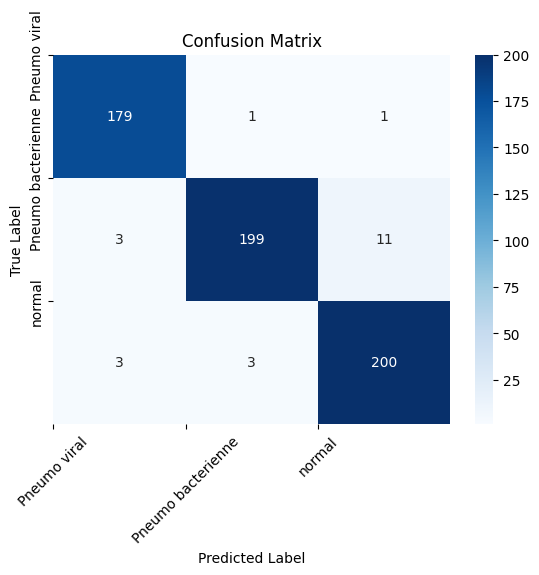

In [91]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prédire les classes pour les données de test
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Calculer la matrice de confusion
class_names = ['Pneumo viral', 'Pneumo bacterienne', 'normal'] 
confusion_mtx = confusion_matrix(y_true, y_pred_classes, labels=range(len(class_names)))

# Afficher la matrice de confusion
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('Confusion Matrix')
plt.show()


# **F1 score et Rappel**

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

class_names = ['pneumonie viral', 'pneunomie bacterienne', 'normal']

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

# Extraire les faux positifs pour chaque classe
fp = {}
for i in range(len(class_names)):
    fp[class_names[i]] = sum(conf_matrix[:, i]) - conf_matrix[i, i]

print("Faux Positifs par classe :")
print(fp)

# Extraire les faux négatifs pour chaque classe
fn = {}
for i in range(len(class_names)):
    fn[class_names[i]] = sum(conf_matrix[i, :]) - conf_matrix[i, i]

print("Faux Négatifs par classe :")
print(fn)


2/2 [==============================] - 9s 5s/step
                       precision    recall  f1-score   support

      pneumonie viral       0.97      0.99      0.98       181
pneunomie bacterienne       0.98      0.93      0.96       213
               normal       0.94      0.97      0.96       206

             accuracy                           0.96       600
            macro avg       0.96      0.96      0.96       600
         weighted avg       0.96      0.96      0.96       600

[[179   1   1]
 [  3 199  11]
 [  3   3 200]]
Faux Positifs par classe :
{'pneumonie viral': 6, 'pneunomie bacterienne': 4, 'normal': 12}
Faux Négatifs par classe :
{'pneumonie viral': 2, 'pneunomie bacterienne': 14, 'normal': 6}
